<img src=https://lstms-brainybits.s3.ap-south-1.amazonaws.com/green+logo.png width="300" height="200" style="float: left; margin-right: 8px;">

We believe in empowering individuals with the
knowledge and skills they need to become lifelong
learners. Our self-learning website offers a diverse
range of high-quality, interactive courses.
**All rights reserved to BrainyBits. Unauthorized reproduction or distribution of this content is prohibited.**

# Random Forest Classification

### 1. Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

### 2. Loading the dataset

In [2]:
dataset = pd.read_csv('sonar data.csv')

### 3. Preprocessing the data

In [3]:
dataset.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


### 4. Splitting the data set

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### 5. Splitting the data into training set and testing set

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,stratify = y,random_state = 1)

In [6]:
print(X.shape, X_train.shape, X_test.shape)

(207, 60) (165, 60) (42, 60)


### 6. Build the Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

### 7. Hyperperameter tunning 

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


### 8. Training the data with grid_searchCV

In [9]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

### 9. Get Best Hyperparameters and Best Model

In [10]:
#Best_Hyperparameters = grid_search.best_params_
print("Best Hyperparameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
best_rf_model

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)

### 10. Evaluate the model

In [11]:
test_accuracy = best_rf_model.score(X_test, y_test)
test_accuracy

0.7142857142857143

### 11. Prediction of test model using the best model

In [12]:
y_pred = best_rf_model.predict(X_test)
y_pred

array(['R', 'R', 'R', 'R', 'R', 'M', 'M', 'R', 'R', 'M', 'R', 'R', 'M',
       'R', 'R', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'R',
       'M', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M',
       'R', 'M', 'M'], dtype=object)

### 12.Confussion Matrix

In [13]:
# confusion matrix

# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[15  8]
 [ 4 15]]

True Positives(TP) =  15

True Negatives(TN) =  15

False Positives(FP) =  8

False Negatives(FN) =  4


<Axes: >

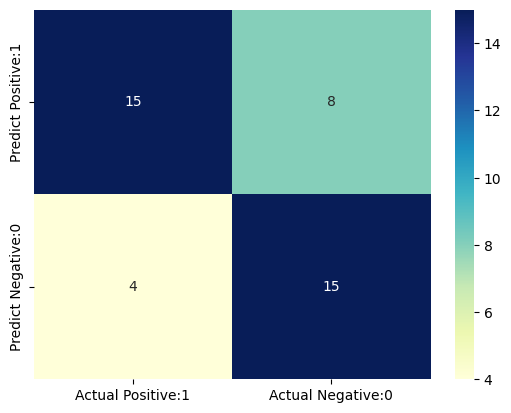

In [14]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.79      0.65      0.71        23
           R       0.65      0.79      0.71        19

    accuracy                           0.71        42
   macro avg       0.72      0.72      0.71        42
weighted avg       0.73      0.71      0.71        42

